# Matplotlib.pyplot.subplots()

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The subplots() function syntax

```
matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw) 
```
## Returns

- **_fig :_** This method return the figure layout.
- **_ax :_** This method return the axes. Axes object or array of Axes objects.

## Example data

In [2]:
x = np.linspace(0, 2 * np.pi, 400)
y1 = np.sin(x)
y2 = np.sin(x ** 2)

## Figure with one subplot

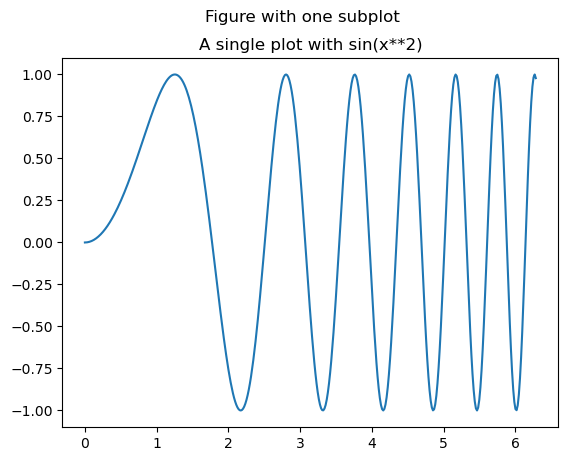

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y2)
ax.set_title('A single plot with sin(x**2)')
fig.suptitle('Figure with one subplot')
plt.show()

## Displaying multiple plots using subplots()

### Stacking subplots in one direction

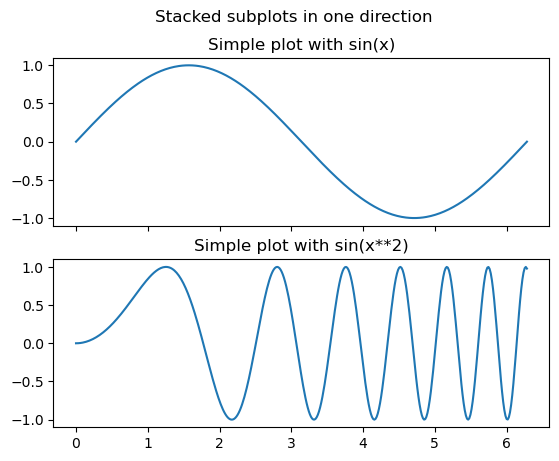

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
# fix, ax = plt.subplots(2, sharex=True)
axs[0].plot(x, y1)
axs[0].set_title('Simple plot with sin(x)')

axs[1].plot(x, y2)
axs[1].set_title('Simple plot with sin(x**2)')

fig.suptitle('Stacked subplots in one direction')
plt.show()

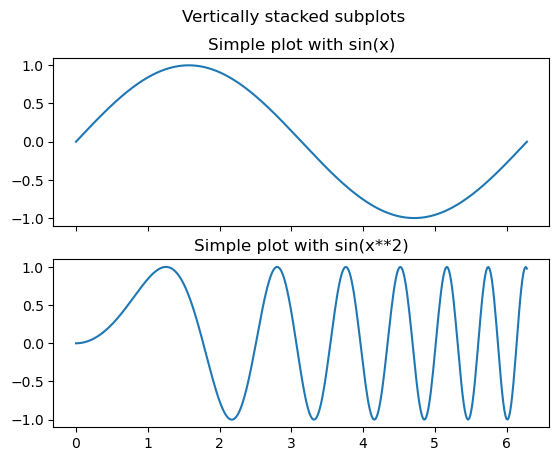

In [5]:
# tuple-unpacking
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(x, y1)
ax1.set_title('Simple plot with sin(x)')
ax2.plot(x, y2)
ax2.set_title('Simple plot with sin(x**2)')

fig.suptitle('Vertically stacked subplots')
plt.show()

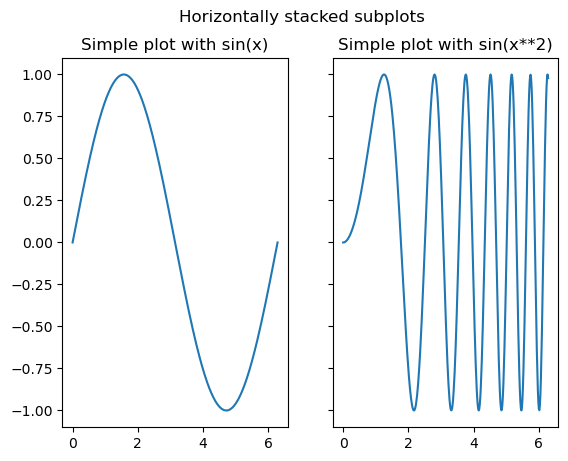

In [6]:
# tuple-unpacking
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.plot(x, y1)
ax1.set_title('Simple plot with sin(x)')
ax2.plot(x, y2)
ax2.set_title('Simple plot with sin(x**2)')

fig.suptitle('Horizontally stacked subplots')
plt.show()

### Stacking subplots in two directions

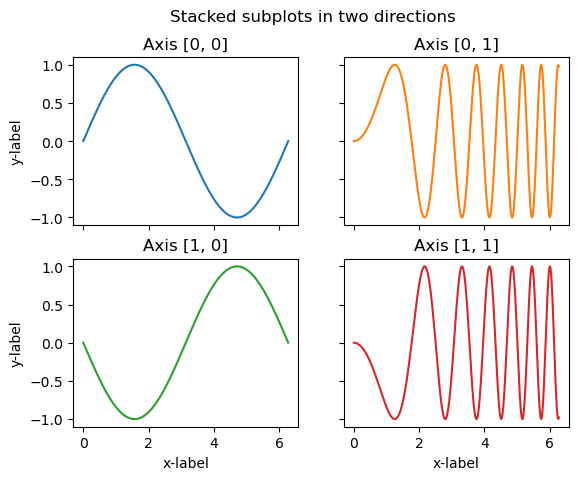

In [7]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y2, color='orange')
axs[0, 1].plot(x, y2, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y1, color='green')
axs[1, 0].plot(x, -y1, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y2, color='red')
axs[1, 1].plot(x, -y2, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Stacked subplots in two directions')
plt.show()

## Sharing axes
By default, each Axes is scaled individually.

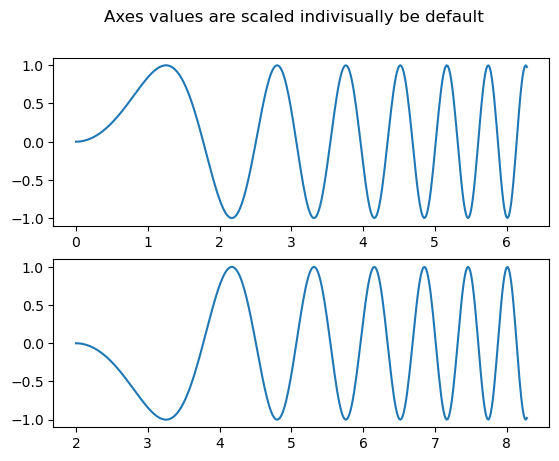

In [8]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled indivisually be default')
ax1.plot(x, y2)
ax2.plot(x+2, -y2)
plt.show()

Use **`sharex`** or **`sharey`** to align the horizontal or vertical axis.

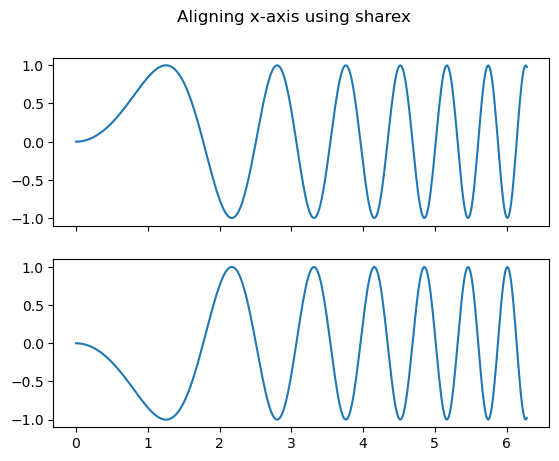

In [9]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y2)
ax2.plot(x, -y2)

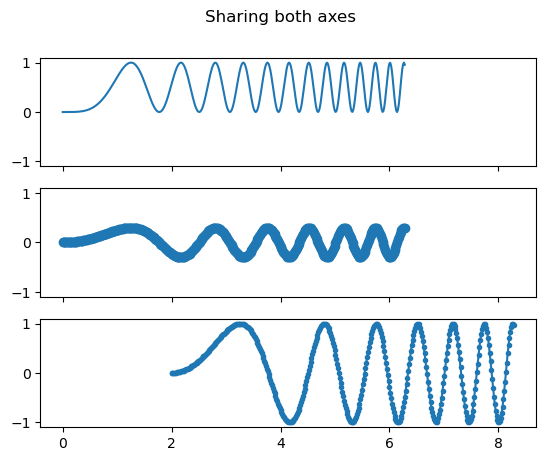

In [10]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y2 ** 2)
axs[1].plot(x, 0.3 * y2, marker='o')
axs[2].plot(x+2, y2, marker='.')

Reduce the height between vertical subplots using **`add_gridspec(hspace=0)`**.

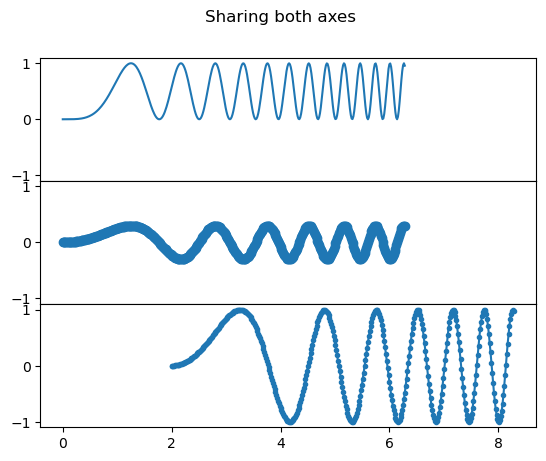

In [11]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')

axs[0].plot(x, y2 ** 2)
axs[1].plot(x, 0.3 * y2, marker='o')
axs[2].plot(x+2, y2, marker='.')

for ax in axs:
    ax.label_outer()

Both sharex and sharey accept the values **`row`** and **`col`** to share the values only per row or column.

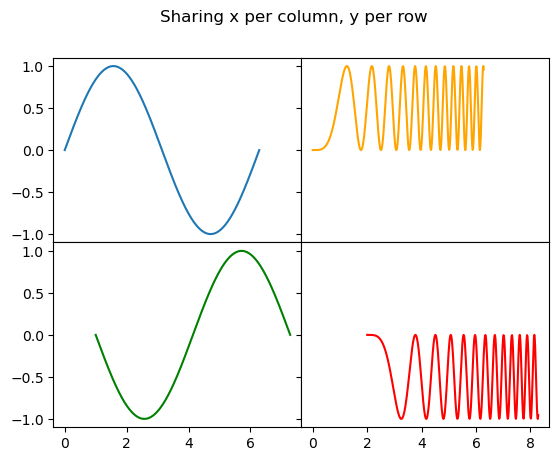

In [12]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y1)
ax2.plot(x, y2**2, color='orange')
ax3.plot(x + 1, -y1, color='green')
ax4.plot(x + 2, -y2**2, color='red')

for ax in fig.get_axes():
    ax.label_outer()

**More complex sharing structure**
1. first create the grid of Axes with no sharing.
2. then call **`axes.Axes.sharex`** or **`axes.Axes.sharey`** to add sharing info.

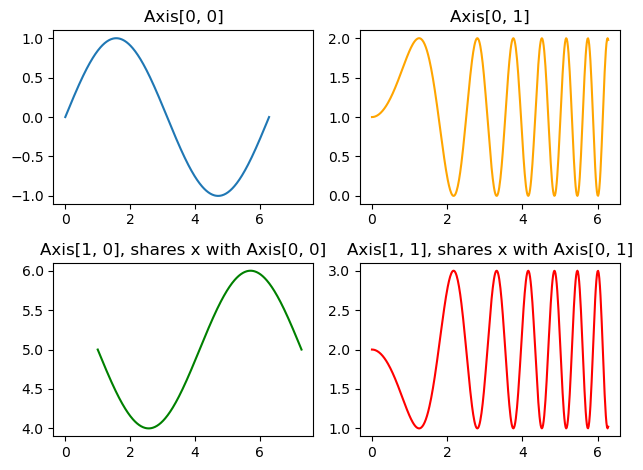

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Axis[0, 0]')
axs[1, 0].plot(x + 1, -y1 + 5, color='green')
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_title('Axis[1, 0], shares x with Axis[0, 0]')
axs[0, 1].plot(x, y2 + 1, color='orange')
axs[0, 1].set_title('Axis[0, 1]')
axs[1, 1].plot(x, -y2 + 2, color='red')
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].set_title('Axis[1, 1], shares x with Axis[0, 1]')
fig.tight_layout()

## Polar Axes
The parameter **subplot_kw** of **`pyplot.subplots`** controls the subplot properties. This can be used to create a grid of polar Axes.

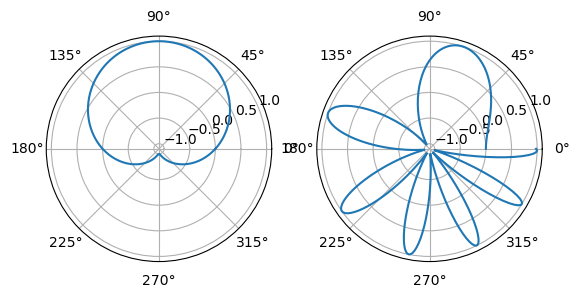

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax1.plot(x, y1)
ax2.plot(x, y2)
plt.show()

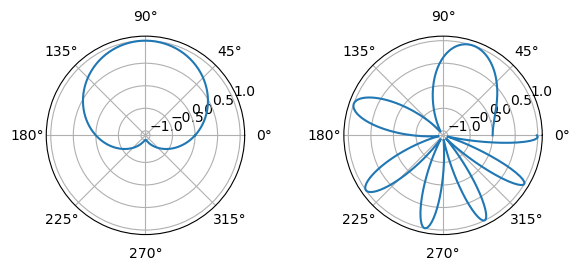

In [15]:
fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0.5)
(ax1, ax2) = gs.subplots(subplot_kw=dict(projection='polar'))
ax1.plot(x, y1)
ax2.plot(x, y2)
plt.show()